# 09. Bethe lattice Green function

With half-bandwidth $D=1$ (i.e. $W=2D=4t$), the Green function on the Bethe lattice can be written as follows.
$$
G_{Bethe} (z)=2(z+\sqrt{1−z^2} \cdot \frac{\log⁡[1−z]−\log⁡[−1+z]}{\pi})
$$
The last term represents the sign function that gives 1 or -1, for Im$z<0$ or Im$z>0$, respectively.

The Bethe lattice Green function satisfies the followings.
$$
G_0 (z)^{-1} = z + \mu - t^2 G(z) 
$$
We thus can substitute the hybridization function by the interacting Green function on the Bethe lattice, i.e. 
$$
\Delta_{hyb}(z) \equiv t^2 G(z) .
$$

In [1]:
ENV["PROJECT_PATH_ED"]="../envs/KED"
include("../src/mybase.jl")

epsilon = 0.01

NFreq   = 50
ReFreqGrid      = LinRange( -1.5, 1.5, NFreq )
ReFreqGridBroad = ReFreqGrid .+ im * epsilon

G0w = GetGzBethe.( ReFreqGridBroad ) # Array{G} in Real-frequency grid

Hybw    = 1. / 4 * G0w

norb    = 1
tij     = zeros(norb,norb)
tij[1,1]= 0.2

@show typeof( G0w )
@show typeof( Hybw )
G0wNew  = GetGreenImpGrid( tij[1,1], Hybw, ReFreqGridBroad )

  Activating project at `~/dmft/ed/github/KaiED/envs/KED`


typeof(G0w) = Vector{ComplexF64}
typeof(Hybw) = Vector{ComplexF64}


50-element Vector{ComplexF64}:
 -0.6626353181451904 - 0.005141118555032493im
 -0.6960240596597956 - 0.005791527968349438im
 -0.7338714288122846 - 0.0066084281077628355im
 -0.7774101394939869 - 0.007669078548510615im
 -0.8285067969462842 - 0.00911174465526995im
 -0.8902349571881256 - 0.011216228461133309im
 -0.9683612919105542 - 0.014670186069088311im
  -1.076585449695434 - 0.02190977195522146im
 -1.2734973631664042 - 0.060509510641305664im
 -1.3732223349744168 - 0.3255621275916153im
 -1.3544394512583309 - 0.48790960630658536im
 -1.3281185767657613 - 0.6133064165776234im
  -1.298392902748452 - 0.7211728540069806im
                     ⋮
  1.6866045998728314 - 2.191067640349622im
   2.118109001546417 - 1.9669145793301281im
  2.6194134618141214 - 1.4791623852532783im
   2.583417359159053 - 0.25079040806820724im
  1.8898100952165202 - 0.06756973089276337im
  1.5802224733539905 - 0.03908077183688098im
  1.3823657026700875 - 0.02705084253460523im
  1.2390605403619455 - 0.02038259254188475im


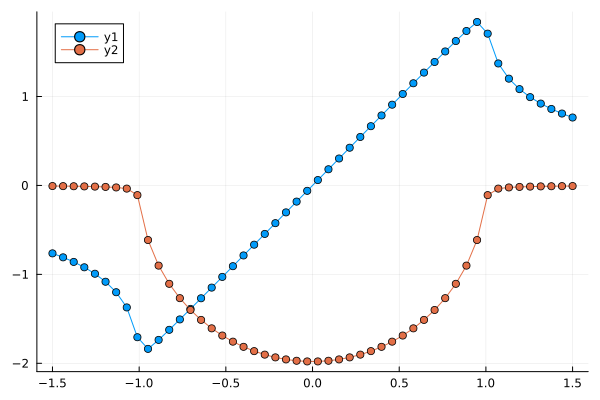

In [2]:
using Plots
xw  = ReFreqGrid
gw  = G0w
gw2 = G0wNew
plot( xw, [real(gw) imag(gw)], marker=:circle )

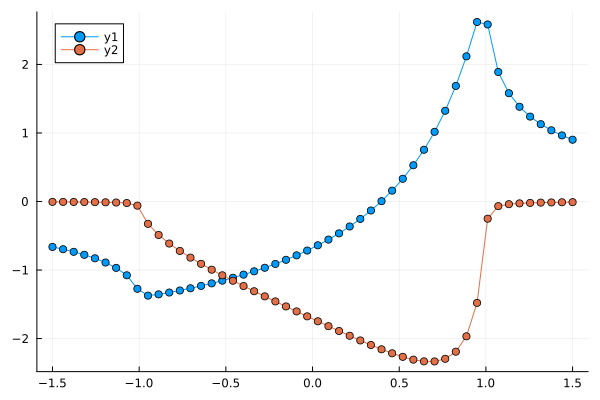

In [14]:

plot( xw, [real(gw2) imag(gw2)], marker=:circle )